### Normalização

In [107]:
# Inteligência Artificial
# Alunos: Helon e Tiago

import pandas as pd # para manipulação e análise de dados
import numpy as np # computação científica - utilizada nas curvas gaussinas
import matplotlib.pyplot as plt # para os gráficos/visualizações
import seaborn as sns #para gerar o mapa de calor (heat map)

#from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler # para fazer a normalização

In [108]:
# DataFrame (df_) é uma estrutura de dados rotulada bidimensional em pandas ("tabela de dados")

# Carregando o arquivo
df_original = pd.read_csv("D:\\Users\\tiago\\OneDrive\\SI UFRRJ\\5p\\Inteligencia Artificial\\Trabalhos\\Trabalho 5 - Redes Neurais Art e Tratamento de Dados\\Fase 1\\Dados inicial\\dados.csv", sep = ";") # "\t" Tabulação que separa

df_original # Imprime parte da tabela
# Essa coluna que é impressa sózinha, mais a esquerda, enumerando, começa com zero mais simboliza a segunda coluna do ".csv", atenção nisso.

 #df_original.head(7) # Linha 9 vira (9-2) = 7. (POIS NÃO CONTA A PRIMEIRA LINHA E COMEÇA EM 0) 7 é onde está um Nan, na coluna V9 (fins de testes)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473,9029.0,53952.0,45770,"43731,1",2512,113.0,29403,80609.0,63724.0,"71,19",158,158,158,1
1,98373,56367.0,-1.0,22473,"68861,1",563,139.0,114136,129245.0,33859.0,"87,57",190,155,119,1
2,787,93203.0,109460.0,105912,"550,9",3258,127.0,11412,300882.0,326.0,"80,01",145,120,72,1
3,4590,76386.0,23087.0,46211,3213,2276,140.0,80428,71589.0,533.0,"88,2",154,137,109,1
4,84631,30822.0,25158.0,12022,"59241,7",2167,143.0,43401,22692.0,88707.0,"90,09",193,193,193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739,10052.0,13710.0,19704,"517,3",6041,118.0,1669,47897.0,680.0,"74,34",88,121,61,0
158,2418,5151.0,8552.0,19830,"1692,6",14374,108.0,1921,37343.0,11061.0,"68,04",77,87,91,0
159,5736,7147.0,16064.0,13879,"4015,2",7682,120.0,3391,NaN,3703.0,"75,6",105,128,66,0
160,5600,13967.0,13290.0,13161,3920,4307,130.0,81,50146.0,98.0,"81,9",121,144,56,0


In [109]:
# Atribuindo nomes às colunas do DataFrame (as células e seus dados não são afetados/acessados)
df_original.columns = ['V1','V2', 'V3',	'V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']

# Visualizando as primeiras linhas do DataFrame
df_original.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473,9029.0,53952.0,45770,"43731,1",2512,113.0,29403,80609.0,63724.0,"71,19",158,158,158,1
1,98373,56367.0,-1.0,22473,"68861,1",563,139.0,114136,129245.0,33859.0,"87,57",190,155,119,1
2,787,93203.0,109460.0,105912,"550,9",3258,127.0,11412,300882.0,326.0,"80,01",145,120,72,1
3,4590,76386.0,23087.0,46211,3213,2276,140.0,80428,71589.0,533.0,"88,2",154,137,109,1
4,84631,30822.0,25158.0,12022,"59241,7",2167,143.0,43401,22692.0,88707.0,"90,09",193,193,193,1


In [110]:
# Substituindo as "vírgulas" por "pontos" - pois o valor decimal aqui, é separado por "pontos" (e não por "vírgulas" como nas planilhas)
df_original = df_original.astype(str) # converter todas as colunas para o tipo string
df_original = df_original.apply(lambda x: x.str.replace(',', '.')) # substituindo


df_original = df_original.astype(float) # converter para float

# Imprime parte da tabela
df_original

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.0,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,-1.0,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.0,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.0,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.0,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739.0,10052.0,13710.0,19704.0,517.3,6041.0,118.0,1669.0,47897.0,680.0,74.34,88.0,121.0,61.0,0.0
158,2418.0,5151.0,8552.0,19830.0,1692.6,14374.0,108.0,1921.0,37343.0,11061.0,68.04,77.0,87.0,91.0,0.0
159,5736.0,7147.0,16064.0,13879.0,4015.2,7682.0,120.0,3391.0,NaN,3703.0,75.60,105.0,128.0,66.0,0.0
160,5600.0,13967.0,13290.0,13161.0,3920.0,4307.0,130.0,81.0,50146.0,98.0,81.90,121.0,144.0,56.0,0.0


In [111]:
# Encontrando valores negativos
valores_negativos = df_original < 0 # retorna um DataFrame booleano em que cada célula contém True ou False

# Calculando a média de cada coluna
medias_colunas = df_original.mean(skipna=True) # mean ("média" em inglês) e ignore os valores vazios. mean() apenas considera as linhas que contêm valores numéricos nas respectivas colunas (e não textos)

# Substituindo valores negativos pela média da coluna correspondente
df_original = df_original.where(~valores_negativos, medias_colunas, axis=1) # "Negação" pois where é substitui valores onde uma determinada condição é "False"

# Visualizando o DataFrame tratado
df_original

# Atenção: para fazer testes, deve-se rodar TUDO de novo, pois o dado da variável é alterado, e ao testar mais acima, já saimos da realidade inicial.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.00000,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,45416.56875,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.00000,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.00000,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.00000,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739.0,10052.0,13710.00000,19704.0,517.3,6041.0,118.0,1669.0,47897.0,680.0,74.34,88.0,121.0,61.0,0.0
158,2418.0,5151.0,8552.00000,19830.0,1692.6,14374.0,108.0,1921.0,37343.0,11061.0,68.04,77.0,87.0,91.0,0.0
159,5736.0,7147.0,16064.00000,13879.0,4015.2,7682.0,120.0,3391.0,NaN,3703.0,75.60,105.0,128.0,66.0,0.0
160,5600.0,13967.0,13290.00000,13161.0,3920.0,4307.0,130.0,81.0,50146.0,98.0,81.90,121.0,144.0,56.0,0.0


In [112]:
# Pegando dados vazios
colunas_nan = df_original.columns[df_original.isna().any()].tolist()

# Calculando a média de cada coluna
medias_colunas = df_original.mean(skipna=True) # Fazer a média ignorando os valores NaN

# Substituindo valores vazios (NaN) pela média da coluna correspondente
df_original[colunas_nan] = df_original[colunas_nan].fillna(medias_colunas)

# Visualizando o DataFrame tratado
df_original
#df_original.head(7) #onde tinha um dado "NaN"
df_original.head(31)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.00000,45770.0,43731.1,2512.0,113.000000,29403.0,80609.000000,63724.00000,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,45416.56875,22473.0,68861.1,563.0,139.000000,114136.0,129245.000000,33859.00000,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.00000,105912.0,550.9,3258.0,127.000000,11412.0,300882.000000,326.00000,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.00000,46211.0,3213.0,2276.0,140.000000,80428.0,71589.000000,533.00000,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.00000,12022.0,59241.7,2167.0,143.000000,43401.0,22692.000000,88707.00000,90.09,193.0,193.0,193.0,1.0
5,169281.0,33454.0,56726.00000,24891.0,118496.7,1588.0,133.000000,25615.0,92582.000000,167743.00000,83.79,210.0,169.0,138.0,1.0
6,52783.0,22091.0,43572.00000,43604.0,36948.1,1750.0,120.000000,36052.0,172412.348021,38135.00000,75.60,164.0,147.0,110.0,1.0
7,1307.0,19877.0,113066.00000,51116.0,914.9,2734.0,121.000000,11814.0,175732.000000,554.00000,76.23,129.0,110.0,70.0,1.0
8,37199.0,2042.0,28813.00000,36207.0,26039.3,1939.0,104.000000,3499.0,66845.000000,35856.00000,65.52,155.0,139.0,112.0,1.0
9,19215.0,1999.0,14998.00000,146361.0,13450.5,352.0,113.000000,83499.0,165535.000000,946.00000,71.19,126.0,123.0,80.0,1.0


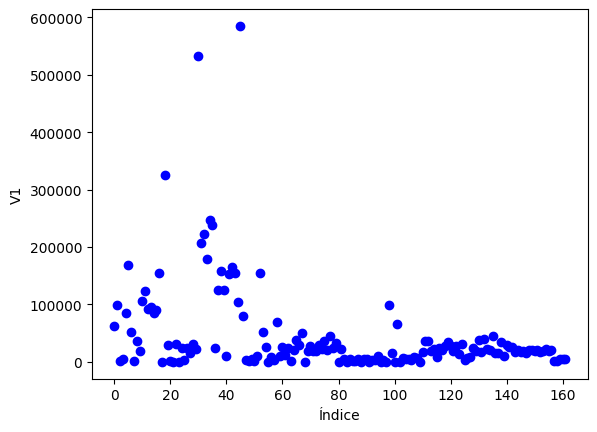

{'V1': [533485.0, 585013.0], 'Indice': [30, 45]}


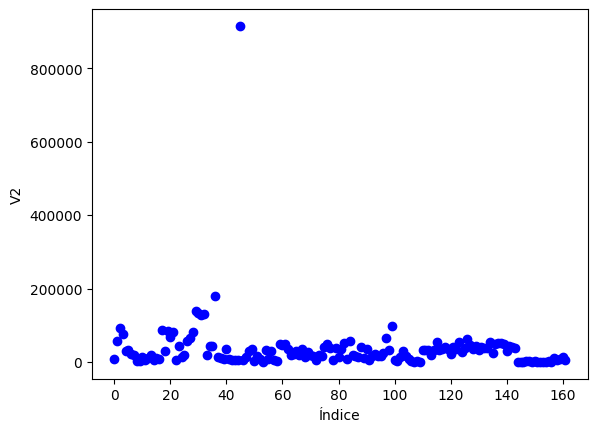

{'V2': [915161.0], 'Indice': [45]}


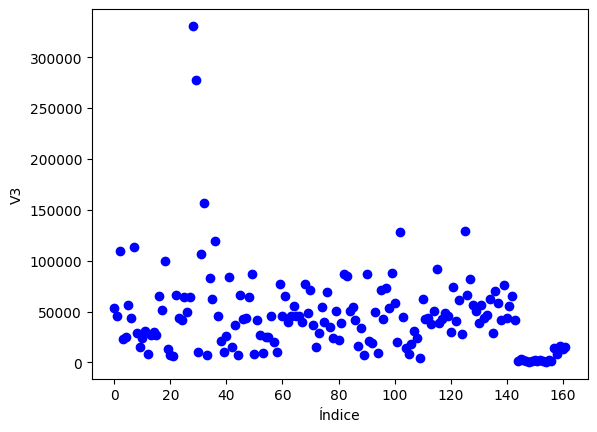

{'V3': [330723.0, 277198.0], 'Indice': [28, 29]}


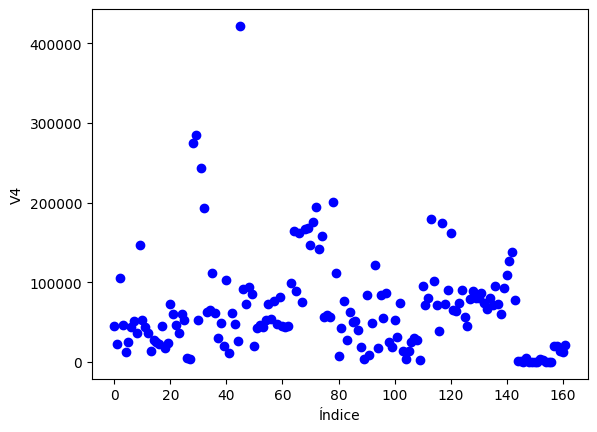

{'V4': [421789.0], 'Indice': [45]}


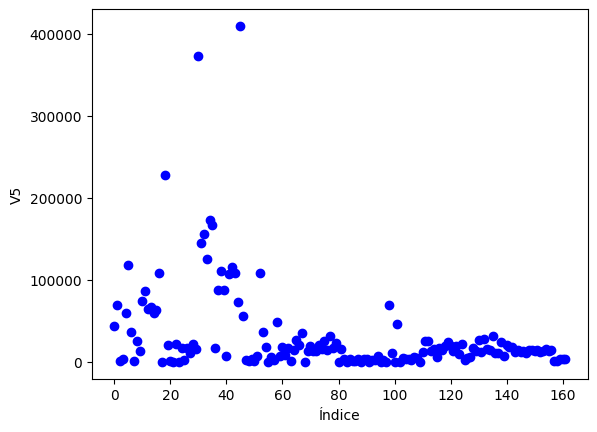

{'V5': [373439.5, 409509.1], 'Indice': [30, 45]}


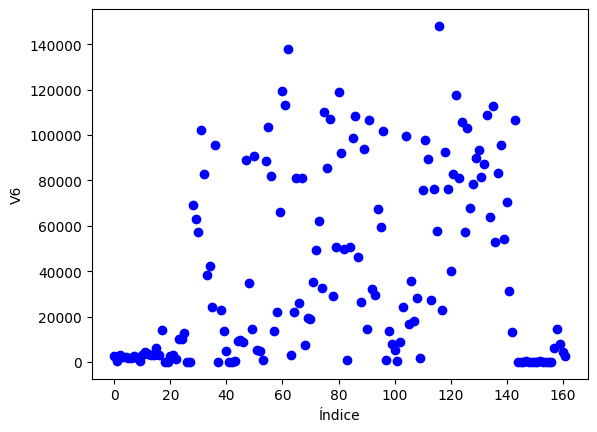

{'V6': [], 'Indice': []}


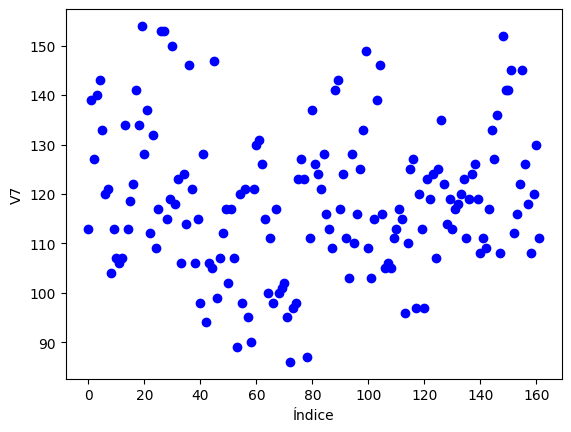

{'V7': [], 'Indice': []}


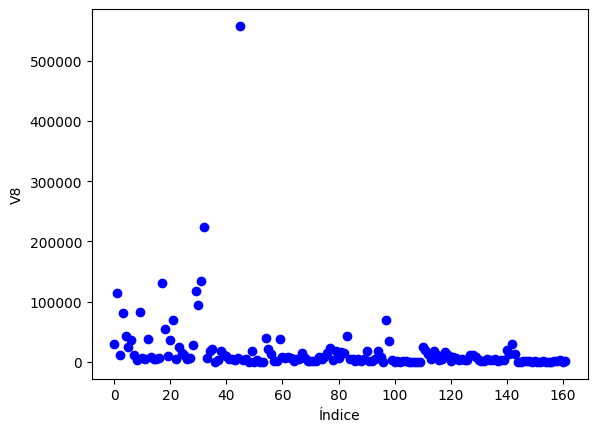

{'V8': [557763.0], 'Indice': [45]}


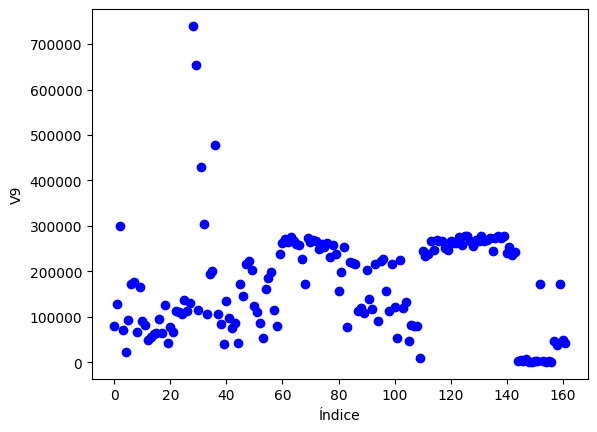

{'V9': [739825.0], 'Indice': [28]}


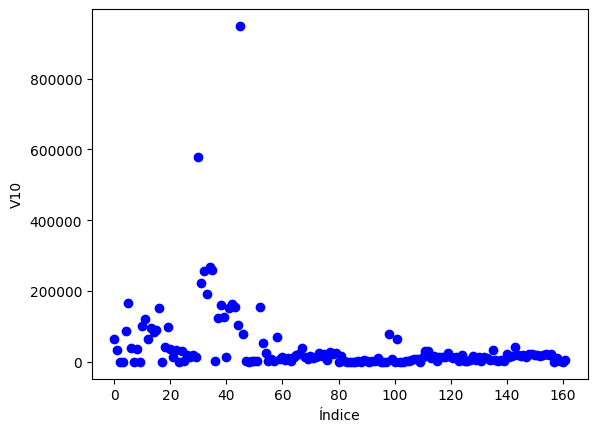

{'V10': [577485.0, 948705.0], 'Indice': [30, 45]}


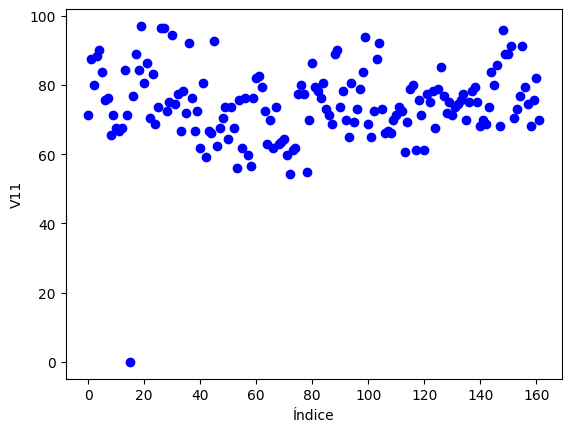

{'V11': [0.0], 'Indice': [15]}


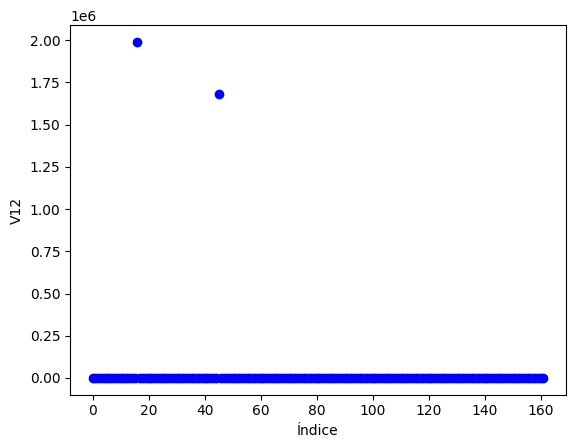

{'V12': [1990000.0, 1680000.0], 'Indice': [16, 45]}


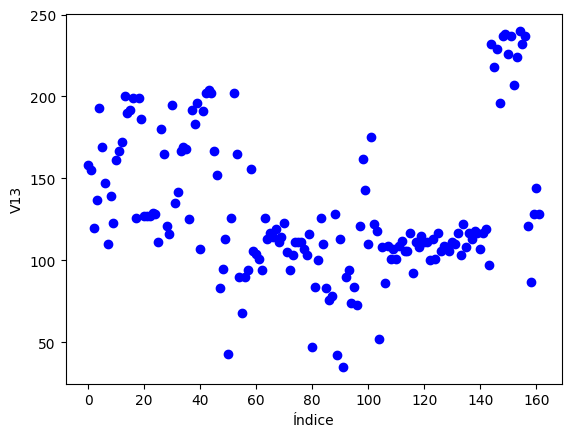

{'V13': [], 'Indice': []}


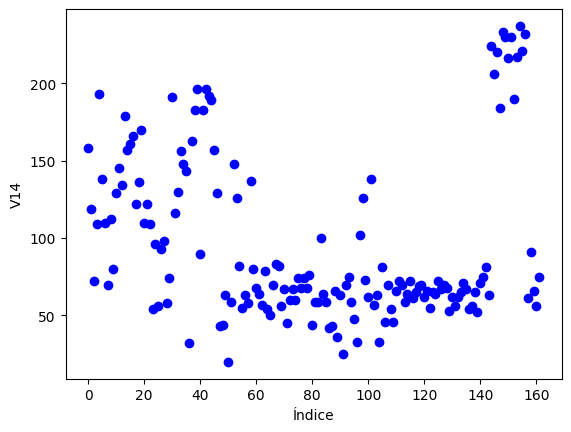

{'V14': [], 'Indice': []}


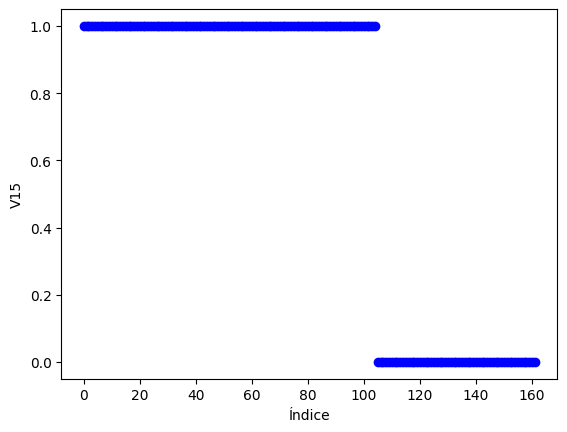

{'V15': [], 'Indice': []}


In [113]:
# Definir limite para considerar um valor como outlier
global limite  # tem que ser definido como global para poder usar no próximo bloco de código (célula)
limite = 5  # Número de desvios padrão a partir da média

# Criar um dicionário vazio para armazenar os outliers
global outliers
outliers = {}
global outliers_dict
outliers_dict = {}

# Percorrer todas as colunas do DataFrame
for coluna in df_original.columns:
    # Plotar gráfico de dispersão da coluna
    plt.scatter(range(len(df_original[coluna])), df_original[coluna], color='blue')
    plt.xlabel('Índice')
    plt.ylabel(coluna)
    plt.show()

    # Definir coluna alvo
    coluna_alvo = coluna

    # Calcular média e desvio padrão da coluna
    media = df_original[coluna_alvo].mean()
    desvio_padrao = df_original[coluna_alvo].std()

    # Identificar outliers
    outliers = df_original.loc[abs(df_original[coluna_alvo] - media) > limite * desvio_padrao]
    outliers_dict = {coluna_alvo: outliers[coluna_alvo].to_list(), 'Indice': outliers.index.to_list()}

    # Exibir os outliers como um dicionário
    print(outliers_dict)


In [114]:
# Percorrer todas as colunas do DataFrame
for coluna in df_original.columns:
    # Calcular média e desvio padrão da coluna
    media = df_original[coluna].mean()
    desvio_padrao = df_original[coluna].std()

    # Identificar outliers
    outliers_coluna = df_original.loc[abs(df_original[coluna] - media) > limite * desvio_padrao]

    # Verificar se há outliers para a coluna atual
    if not outliers_coluna.empty:
        # Armazenar os valores outliers e seus índices no dicionário
        outliers[coluna] = {
            'Valores': outliers_coluna[coluna].to_list(),
            'Indice': outliers_coluna.index.to_list()
        }

        # Calcular a média da coluna
        media_coluna = df_original[coluna].mean()

        # Substituir os outliers pela média da coluna
        for i in range(len(outliers[coluna]['Valores'])):
            valor_outlier = outliers[coluna]['Valores'][i]
            indice_outlier = outliers[coluna]['Indice'][i]

            df_original.loc[indice_outlier, coluna] = media_coluna

# Exiba o DataFrame com os outliers substituídos
df_original.head(31)

C:\Users\tiago\AppData\Local\Temp\ipykernel_13956\73018788.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers[coluna] = {


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.000000,9029.0,53952.000000,45770.0,43731.100000,2512.0,113.000000,29403.0,80609.000000,63724.00000,71.190000,158.00000,158.0,158.0,1.0
1,98373.000000,56367.0,45416.568750,22473.0,68861.100000,563.0,139.000000,114136.0,129245.000000,33859.00000,87.570000,190.00000,155.0,119.0,1.0
2,787.000000,93203.0,109460.000000,105912.0,550.900000,3258.0,127.000000,11412.0,300882.000000,326.00000,80.010000,145.00000,120.0,72.0,1.0
3,4590.000000,76386.0,23087.000000,46211.0,3213.000000,2276.0,140.000000,80428.0,71589.000000,533.00000,88.200000,154.00000,137.0,109.0,1.0
4,84631.000000,30822.0,25158.000000,12022.0,59241.700000,2167.0,143.000000,43401.0,22692.000000,88707.00000,90.090000,193.00000,193.0,193.0,1.0
5,169281.000000,33454.0,56726.000000,24891.0,118496.700000,1588.0,133.000000,25615.0,92582.000000,167743.00000,83.790000,210.00000,169.0,138.0,1.0
6,52783.000000,22091.0,43572.000000,43604.0,36948.100000,1750.0,120.000000,36052.0,172412.348021,38135.00000,75.600000,164.00000,147.0,110.0,1.0
7,1307.000000,19877.0,113066.000000,51116.0,914.900000,2734.0,121.000000,11814.0,175732.000000,554.00000,76.230000,129.00000,110.0,70.0,1.0
8,37199.000000,2042.0,28813.000000,36207.0,26039.300000,1939.0,104.000000,3499.0,66845.000000,35856.00000,65.520000,155.00000,139.0,112.0,1.0
9,19215.000000,1999.0,14998.000000,146361.0,13450.500000,352.0,113.000000,83499.0,165535.000000,946.00000,71.190000,126.00000,123.0,80.0,1.0


In [115]:
# Criando arquivo ".csv" com a tabela sem os dados espúrios
df_original.to_csv('dados_sem_espurios.csv', sep=';')

# Visualizando novamente o DataFrame Original
df_original.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.00000,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,45416.56875,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.00000,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.00000,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.00000,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0


In [116]:
# Criando um objeto para NORMALIZAR os dados
obj_normalizacao = MinMaxScaler().fit(df_original) # fit é utilizada para calcular os valores mínimos e máximos de cada coluna dos dados

In [117]:
# Aplicando a NORMALIZAÇÃO
df_normalizado = obj_normalizacao.transform(df_original) # transform() é usada para aplicar a normalização usando os valores calculados anteriormente.

In [118]:
# Visualizando os dados normalizados
df_normalizado

array([[0.19245853, 0.05019054, 0.34232844, ..., 0.6       , 0.6359447 ,
        1.        ],
       [0.30305448, 0.3150941 , 0.28765689, ..., 0.58536585, 0.4562212 ,
        1.        ],
       [0.00242449, 0.52122843, 0.6978709 , ..., 0.41463415, 0.23963134,
        1.        ],
       ...,
       [0.01767071, 0.03965887, 0.09964643, ..., 0.45365854, 0.21198157,
        0.        ],
       [0.01725174, 0.0778236 , 0.08187827, ..., 0.53170732, 0.16589862,
        0.        ],
       [0.01506138, 0.03255754, 0.09705231, ..., 0.45365854, 0.25345622,
        0.        ]])

In [119]:
# transformando para DataFrame e nomeando as colunas
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['V1','V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']

# visualizando os dados NORMALIZADOS
df_normalizado.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0.192459,0.050191,0.342328,0.160005,0.192459,0.016963,0.397059,0.131057,0.121872,0.238356,0.397059,0.005847,0.600000,0.635945,1.0
1,0.303054,0.315094,0.287657,0.078346,0.303054,0.003802,0.779412,0.509340,0.196423,0.126648,0.779412,0.007254,0.585366,0.456221,1.0
2,0.002424,0.521228,0.697871,0.370810,0.002424,0.022000,0.602941,0.050738,0.459516,0.001219,0.602941,0.005275,0.414634,0.239631,1.0
3,0.014140,0.427120,0.144630,0.161551,0.014140,0.015369,0.794118,0.358853,0.108046,0.001994,0.794118,0.005671,0.497561,0.410138,1.0
4,0.260720,0.172144,0.157896,0.041714,0.260720,0.014633,0.838235,0.193550,0.033094,0.331803,0.838235,0.007386,0.770732,0.797235,1.0


In [120]:
#fazendo correlação das variaveis
df_normalizado.corr()

df_normalizado.corr().to_csv('dados_correlacionados.csv', sep=';')

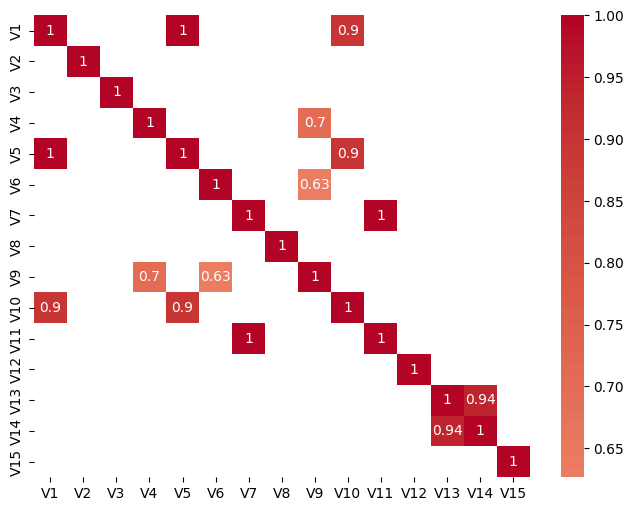

In [121]:
# Calcular a matriz de correlação
correlation_matrix = df_normalizado.corr()

# Filtrar apenas as correlações acima de 0.6
correlations_above_threshold = correlation_matrix > 0.6

# Substituir as correlações abaixo do limiar por NaN
correlation_matrix[~correlations_above_threshold] = np.nan

# Gerar o mapa de calor com as correlações acima de 0.6
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.show()

In [122]:
# Criando dois novos DataFrames, df_classe_0 e df_classe_1, contendo apenas as linhas onde a coluna "V15" (classe) é igual a 0 e 1, respectivamente...
#... Separando os dados normalizados para cada classe:

# Classe igual a 0
df_classe_0 = df_normalizado[df_normalizado['V15'] == 0]

# Média e desvio padrão para a classe 0
media_classe0 = df_classe_0.mean(axis=0)
desvio_padrao_classe0 = df_classe_0.std(axis=0)

# Classe igual a 1
df_classe_1 = df_normalizado[df_normalizado['V15'] == 1]

# Média e desvio padrão para a classe 1
media_classe1 = df_classe_1.mean(axis=0)
desvio_padrao_classe1 = df_classe_1.std(axis=0)

# O resultado das operações:
#  uma série de valores para a média e o desvio padrão de cada coluna em cada uma das classes.

In [123]:
# Criar DataFrame descritivo para ambas as classes
descritivo_classes = pd.DataFrame({'Media Classe 0': media_classe0, 'Media Classe 1': media_classe1,
                                   'Desvio Padrao Classe 0': desvio_padrao_classe0, 'Desvio Padrao Classe 1': desvio_padrao_classe1})

descritivo_classes.to_csv('estatistica_classes.csv', sep=';', float_format='%.6f')

# visualizando DataFrame descritivo
descritivo_classes.head()

,Media Classe 0,Media Classe 1,Desvio Padrao Classe 0,Desvio Padrao Classe 1
V1,0.058806,0.152073,0.032864,0.202611
V2,0.137234,0.182865,0.110166,0.187199
V3,0.224551,0.293210,0.181491,0.189905
V4,0.197702,0.243355,0.166213,0.201399
V5,0.058806,0.152073,0.032864,0.202611


In [124]:
#exportando descrição dos dados

# Arredondar os valores para 6 casas decimais
df_normalizado_rounded = df_normalizado.round(6)

df_normalizado_rounded.to_csv('dados_normalizadas.csv', sep=';')

In [125]:
#exportando descrição dos dados
df_normalizado.describe().to_csv('dados_estatisticos.csv', sep=';', float_format='%.6f')

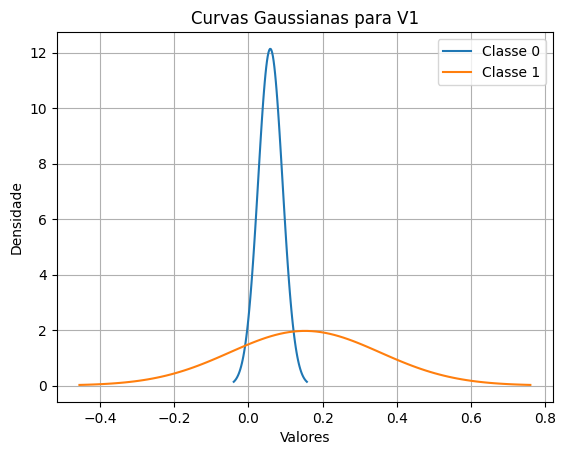

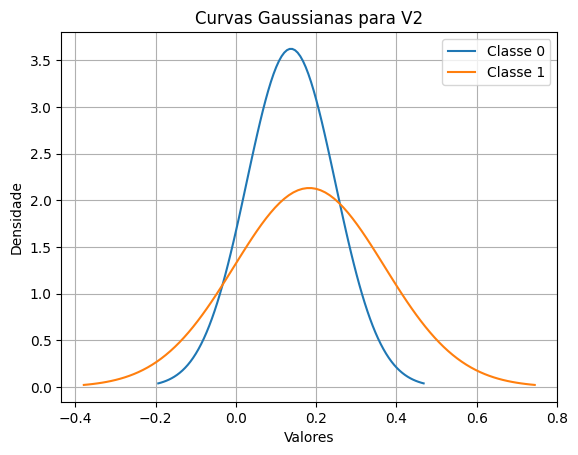

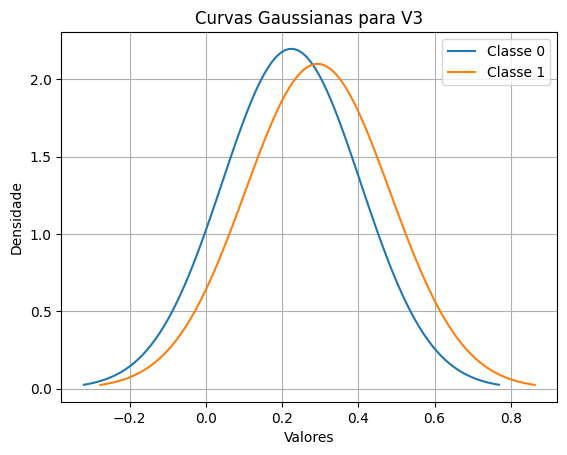

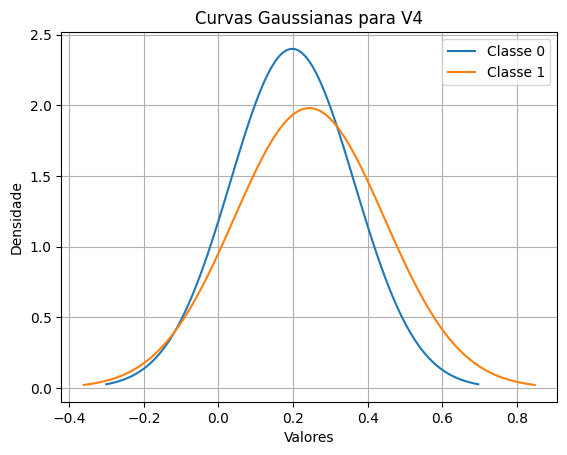

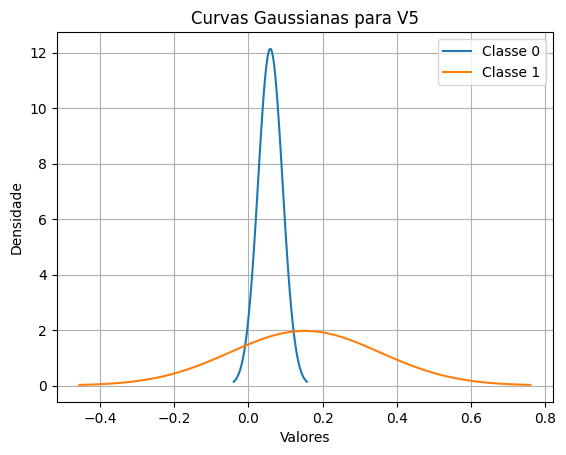

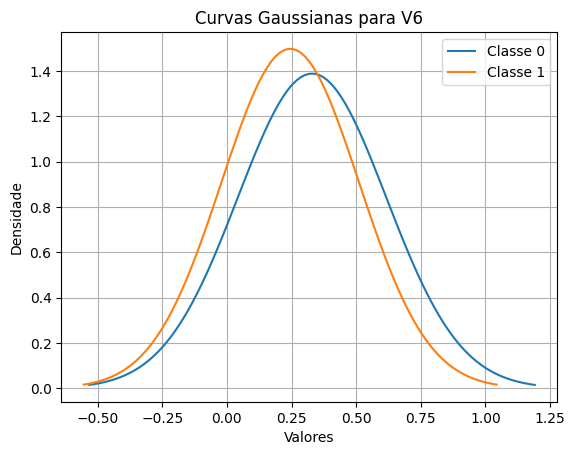

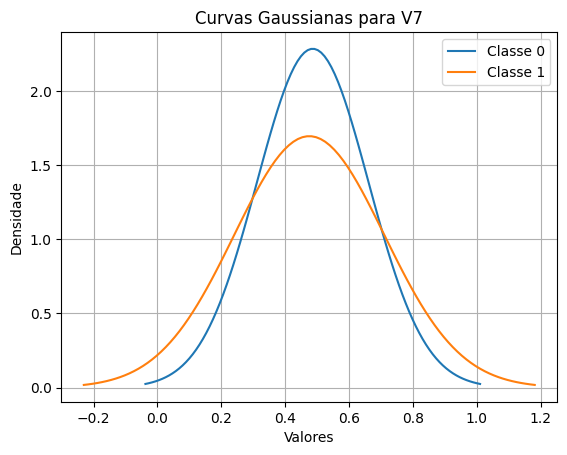

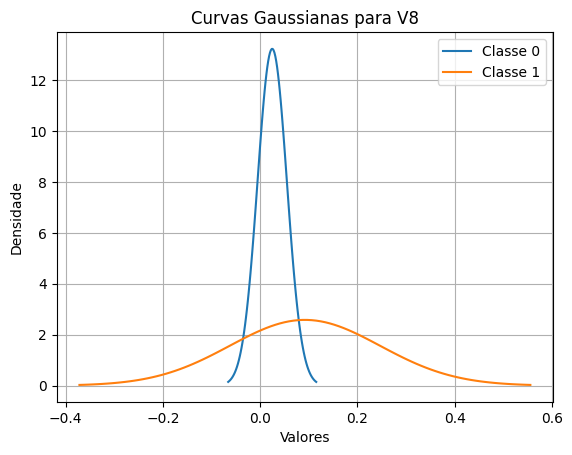

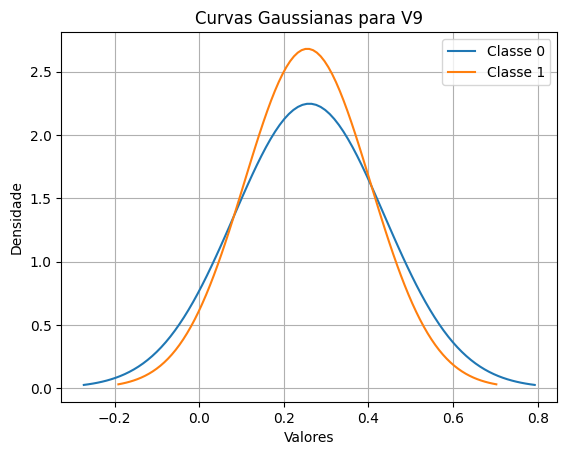

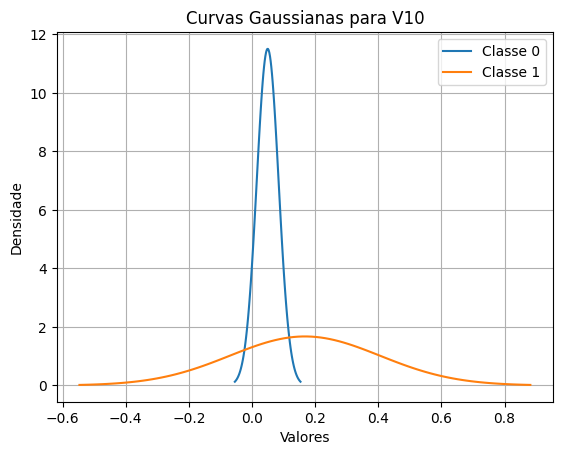

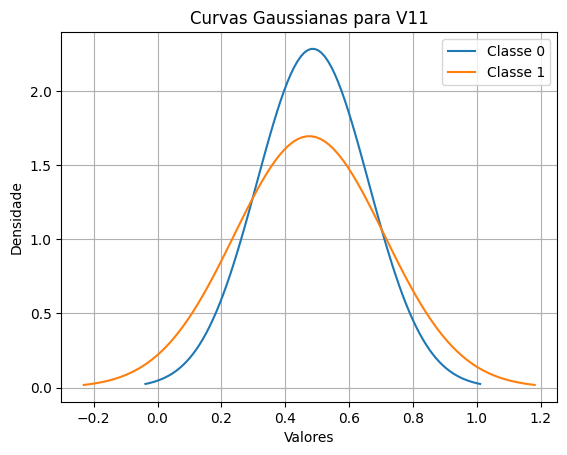

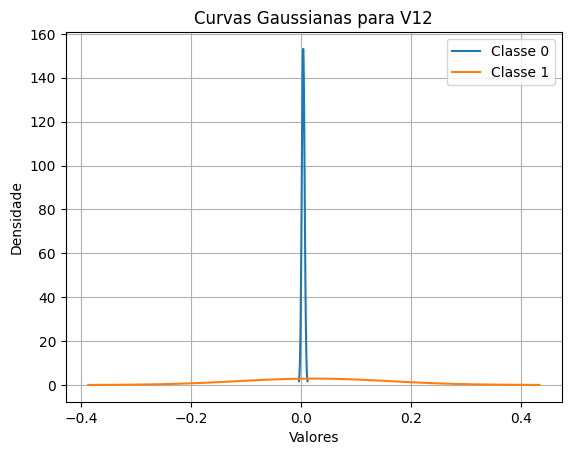

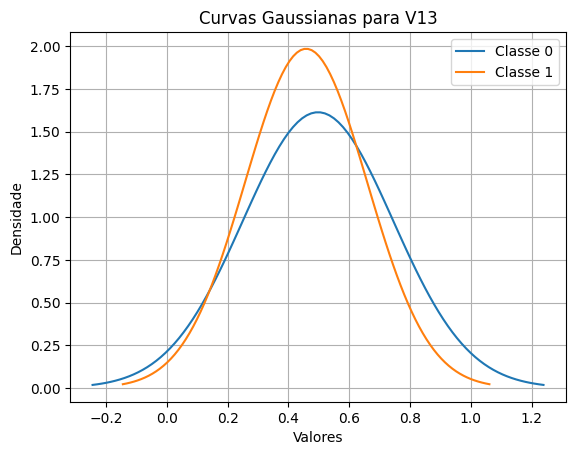

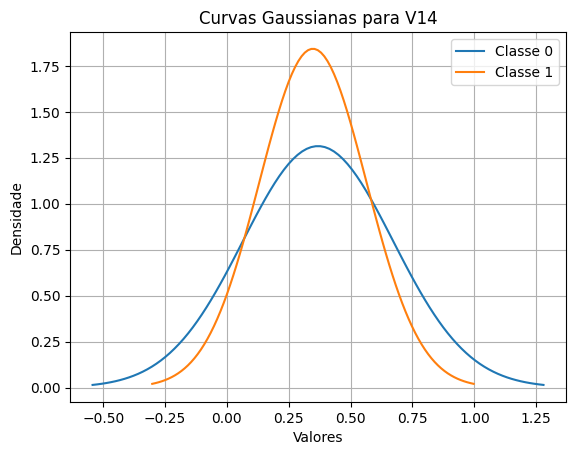

In [126]:
# Função para plotar a curva gaussiana
def plot_gaussiana(media, desvio_padrao, label):
    x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 100)
    #x_padronizado = (x - np.min(x)) / (np.max(x) - np.min(x))
    #MANDAR EMAIL PRA KUPAC


    y = (1 / (desvio_padrao * np.sqrt(2*np.pi))) * np.exp(-0.5*((x - media)/desvio_padrao)**2)
    plt.plot(x, y, label=label)

# Separar os dados em classes 0 e 1
df_classe_0 = df_normalizado[df_normalizado['V15'] == 0]
df_classe_1 = df_normalizado[df_normalizado['V15'] == 1]

# Iterar pelas colunas de V1 a V14
for coluna in df_normalizado.columns[:-1]:
    # Calcular média e desvio padrão para a classe 0
    media_classe0 = df_classe_0[coluna].mean()
    desvio_padrao_classe0 = df_classe_0[coluna].std()
    
    # Calcular média e desvio padrão para a classe 1
    media_classe1 = df_classe_1[coluna].mean()
    desvio_padrao_classe1 = df_classe_1[coluna].std()
    
    # Plotar as curvas gaussianas para a coluna atual
    plt.figure()
    plot_gaussiana(media_classe0, desvio_padrao_classe0, 'Classe 0')
    plot_gaussiana(media_classe1, desvio_padrao_classe1, 'Classe 1')
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.title(f'Curvas Gaussianas para {coluna}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [127]:
#Dados que vão ser usados na rede neural 

#Variaveis escolhidas = V1, V2, V7 ,V8 , V12, V14, V15

# Selecionar apenas as variáveis desejadas
df_selecionado = df_normalizado[['V1', 'V2', 'V7', 'V8', 'V12', 'V14', 'V15']].copy()

# Mostrar o DataFrame atualizado
df_selecionado

df_selecionado.to_csv('dados_escolhidos.csv', sep=';')